In [1]:
import pandas as pd

In [2]:
primary = pd.read_csv('API_primary.csv')
secondary = pd.read_csv('API_secondary.csv')
pmetadata = pd.read_csv('Metadata_primary.csv')
smetadata = pd.read_csv('Metadata_secondary.csv')

In [3]:
primarytotal = primary.merge(pmetadata,how='inner',on='Country Code')
secondarytotal = secondary.merge(smetadata,how='inner',on='Country Code')
primarytotalworld = primarytotal[primarytotal['Country Code'] == 'WLD']
secondarytotalworld = secondarytotal[secondarytotal['Country Code'] == 'WLD']

In [9]:
prim_list=[]
for i in range(2000,2021):
    prim_list.append(primarytotalworld[f'{i}'])
    
newlist=pd.DataFrame(prim_list)
newlist['Year']=newlist.index
sec_list=[]
for i in range(2000,2021):
    sec_list.append(secondarytotalworld[f'{i}'])
    
newlist2=pd.DataFrame(sec_list)
newlist2['Year']=newlist2.index

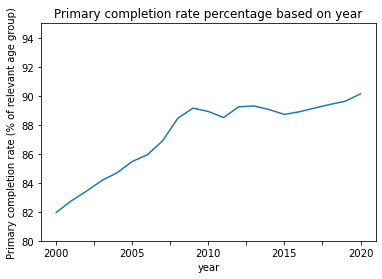

In [22]:
import matplotlib.pyplot as plt
ax=newlist.plot.line()
plt.xlabel('year')
plt.ylabel('Primary completion rate (% of relevant age group)')
plt.ylim([80,95])     #y limit
plt.title('Primary completion rate percentage based on year')

ax.get_legend().remove()

In [12]:
pt50 = primarytotal.groupby('IncomeGroup')['2018'].describe().sort_values('50%')      #.sort_values('median'), sort_values only on dataframes
ptmedian = pt50['50%']
st50 = secondarytotal.groupby('IncomeGroup')['2018'].describe().sort_values('50%')      #.sort_values('median'), sort_values only on dataframes
stmedian = st50['50%']

Text(0.5, 1.0, 'primary completion rate by income level')

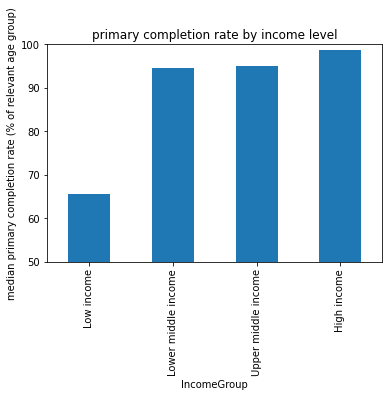

In [13]:
axpt=ptmedian.plot.bar()

plt.ylabel('median primary completion rate (% of relevant age group)')
plt.ylim([50,100])     #y limit
plt.title('primary completion rate by income level')

Text(0.5, 1.0, 'Secondary School Enrollment by income level')

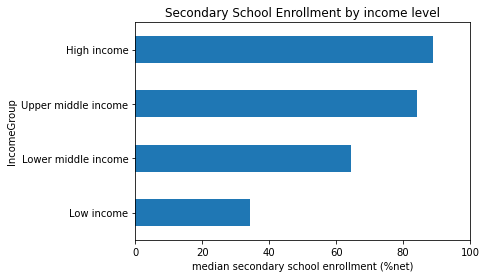

In [23]:
axst=stmedian.plot.barh()

plt.xlabel('median secondary school enrollment (%net)')
plt.xlim([0,100])     #y limit
plt.title('Secondary School Enrollment by income level')

High income            79
Lower middle income    55
Upper middle income    55
Low income             27
Name: IncomeGroup, dtype: int64

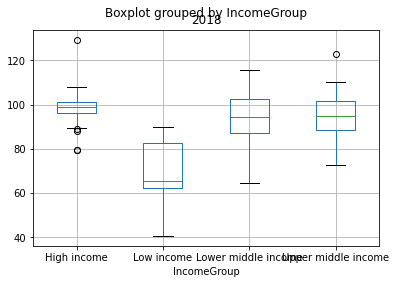

In [21]:
box_test_data=primarytotal[['2018',"IncomeGroup"]]
axbtd=box_test_data.boxplot(column='2018',by='IncomeGroup')
box_test_data.IncomeGroup.value_counts()
# plt.ylabel('median secondary school enrollment (%net)')
# plt.ylim([0,100])     #y limit
# plt.title('Secondary School Enrollment by income level')